# Kalorimetrie Küchentischversuch - Newtonsches Abkühlungsgesetz
Author: Henrik Büchs

Datum: 22.11.2023

Gruppe: 58

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Lässt sich das Newton'sche Abkühlungsgesetz auch mit meiner Thermosflasche nachweisen?

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Machen Sie ein Bild von Ihrem Aufbau und nutzen Sie dieses mit zur Beschreibung.


Eine Thermosflasche wird heißem Wasser befüllt. Zusätzlich wird in die Flasche ein Teebeutel und ein Sensor gehängt. Beide befinden sich dabei im Wasser. Der zweite Sensor hängt neben der Flasche in der Luft und misst die Umgebungstemperatur. Wenn beide Sensoren die Temperaturen des umgebenden Mediums angenommen haben, wird die Messung gestartet und frühestens nach zehn Minuten beendet.
<img src="figures/newton.jpg" width="400">

## Versuchsauswertung

In [25]:
import numpy as np
import h5py as h5
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib

from functions import m_json

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Newtonsches Abkühlungsgesetz

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [26]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

path_hdf5 = "data/newton/newton.h5"

# DONE #

In [27]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.

f = h5.File(path_hdf5, "r")
keys = list(f['RawData'].keys())
data = f['RawData']

# DONE #

#### (ii) Daten Semi–log ploten

Die Zeit und Differenz zwischen der heißen Flüssigkeit und der Umgebungstemperatur wird aufgezeichnet.

Die y-Achse (Temperaturdifferenz) ist auf logarithmisch eingestellt und die x-Achse (Zeit) verwendet eine normale Skalierung.

Text(0, 0.5, 'temperatur [°C]')

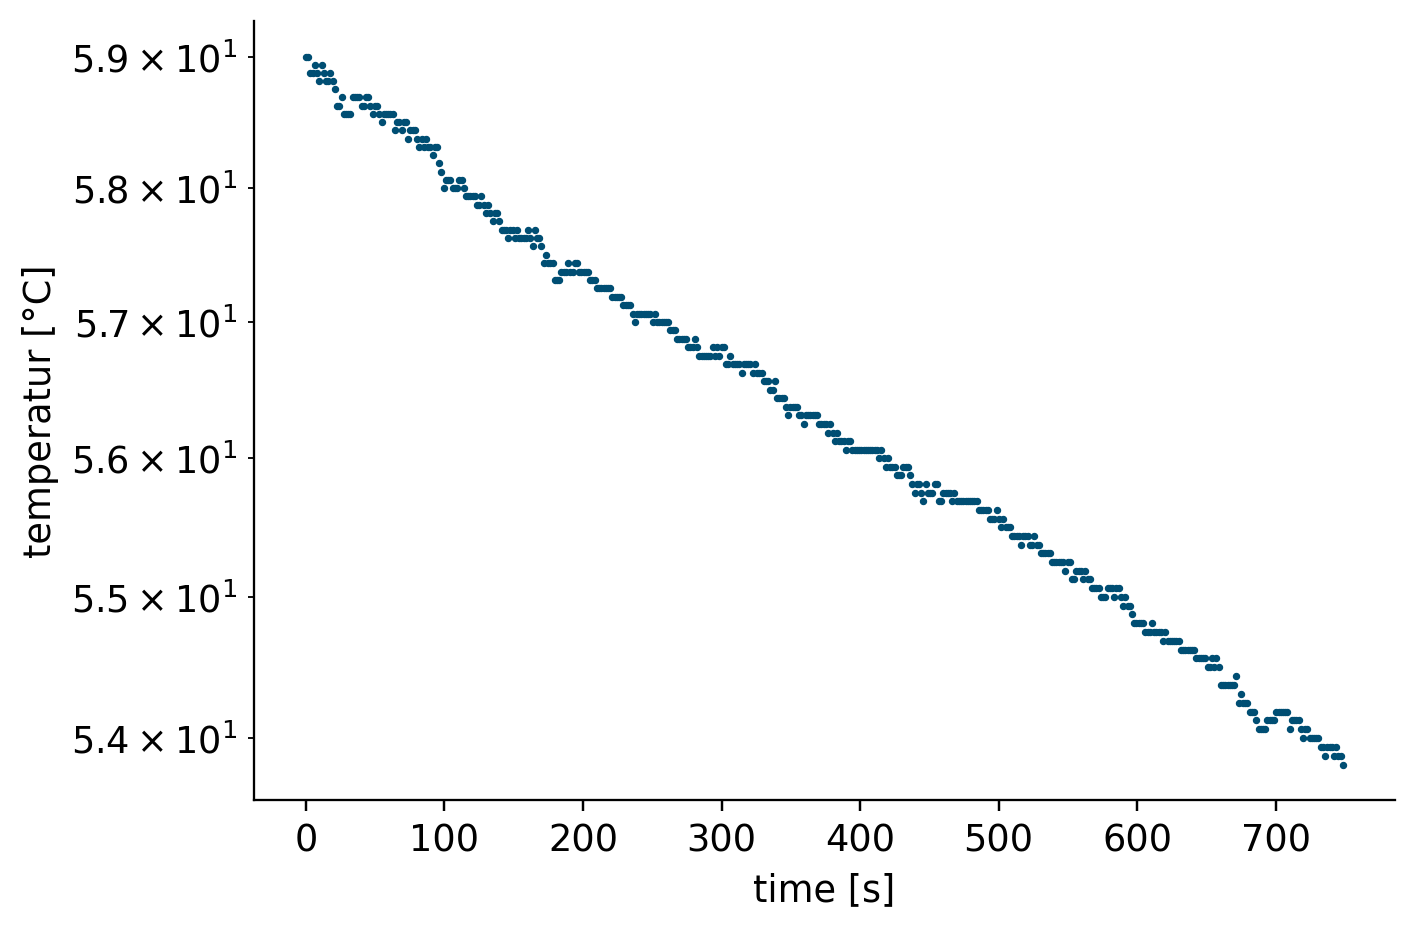

In [28]:
# TODO: Use the temperature and time data for plotting

start = data[keys[0]]['timestamp'][0] # Startzeit der Messung auslesen

j = 0
timestamps = [] # Liste für timestamps vorbereiten
for i in data[keys[0]]['timestamp']:
    timestamps.append(data[keys[0]]['timestamp'][j] - start) # Zeit relativ zur Startzeit in Liste schreiben
    j = j + 1

# Differenz zwischen Temperaturverlauf und Außentemperatur berechnen
dif_temperature = np.array(list(data[keys[0]]['temperature'])) - np.array(list(data[keys[1]]['temperature']))

# Daten plotten
plt.scatter(timestamps, dif_temperature, s=2)
plt.yscale('log')

# Diagramm beschriften
plt.xlabel('time [s]')
plt.ylabel('temperatur [°C]')
# DONE #

#### (iii) Koeffizient in Newtonschem Abkühlungsgesetz
Die `numpy.polyfit` Funktion ist zu verwenden, um den Koeffizienten $K$ zu bestimmen.
$$
T(t) - T_2 = (T_1 - T_2)e^{Kt}
$$
Dabei ist $T(t) - T_2$ der Verlauf der Temperaturdifferenz. Die Anfangstemperatur ist $T_1$, die Endtemperatur ist $T_2$.

In [29]:
# TODO: Determine coefficient in Newtonschen Abkühlungsgesetz
T1_T2 = list(data[keys[0]]['temperature'])[0] - list(data[keys[1]]['temperature'])[0]
coef = np.polyfit(timestamps, np.log(dif_temperature/T1_T2), 1)
K = coef[0]
# DONE #

#### (iV) Ergebnis

In [30]:
# TODO: Print result

print("Transportkoeffizient [1/s]: ", K)
f.close()

# DONE #

Transportkoeffizient [1/s]:  -0.00011669728822237802


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.
Können Sie das Newtonsche Abkühlungsgesetz bestätigen?

Das Newton'sche Abkühlungsgesetz kann ich nicht bestätigen, da die Temperaturdifferenz einen linearen Verlauf aufweist. Nach dem Gesetz müsste sie einen logarithmischen Verlauf besitzen. Vermutlich wäre der Verlauf bei längerer Betrachtung logarithmisch. Für diese kurze Betrachtungszeit von ca. zehn Minuten könnte die Isolation der Thermosflasche zu groß.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Wissenschaft ist schwierig. Damit man etwas nachvollziehbar beweisen kann, braucht man manchmal sehr genaue Messwerte.